In [1]:
import numpy as np 
import pandas as pd 
import random 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print(X_train.shape) 
(60000, 28, 28)

(60000, 28, 28)


(60000, 28, 28)

In [6]:
print(X_train.shape)

(60000, 28, 28)


In [7]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [8]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0) 
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

C:\Users\pends\AppData\Local\Temp\ipykernel_17692\3090348775.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 10))


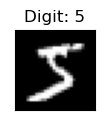

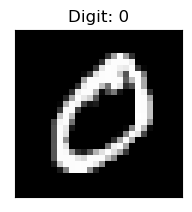

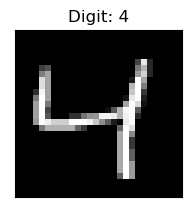

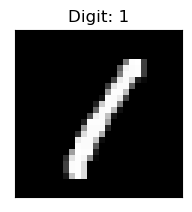

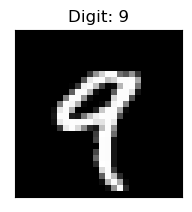

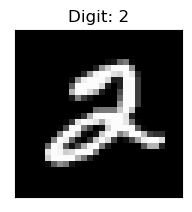

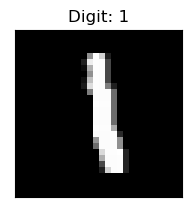

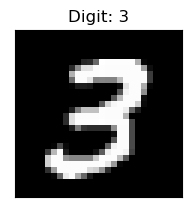

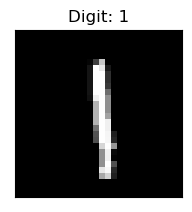

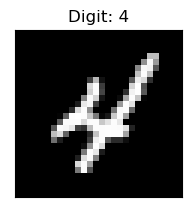

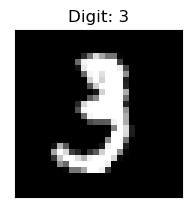

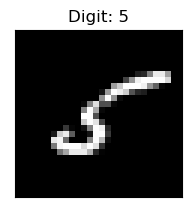

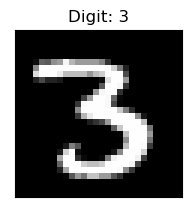

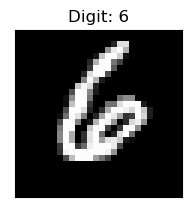

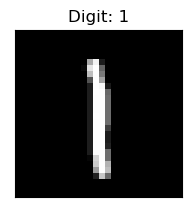

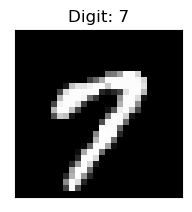

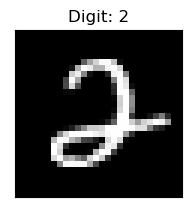

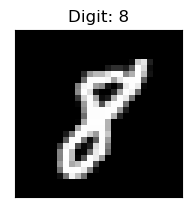

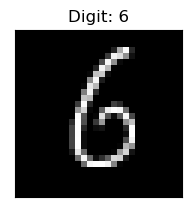

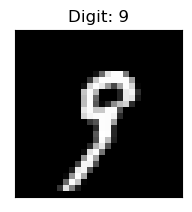

<Figure size 1600x1000 with 0 Axes>

In [10]:
def plot_digit(image, digit, plt, i): 
    plt.subplot(4, 5, i + 1) 
    plt.imshow(image, cmap=plt.get_cmap('gray')) 
    plt.title(f"Digit: {digit}") 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.figure(figsize=(16, 10)) 
for i in range(20): plot_digit(X_train[i], y_train[i], plt, i) 
plt.show()

In [11]:
X_train = X_train.reshape((X_train.shape + (1,))) 
X_test = X_test.reshape((X_test.shape + (1,)))

In [12]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [14]:
model = Sequential([ 
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)), MaxPooling2D((2, 2)), Flatten(), Dense(100, activation="relu"), Dense(10, activation="softmax") ])

In [16]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile( optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [18]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2429 - accuracy: 0.9245
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0784 - accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0492 - accuracy: 0.9853
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0341 - accuracy: 0.9898
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0248 - accuracy: 0.9924


1/1 [==============================] - 0s 16ms/step


C:\Users\pends\AppData\Local\Temp\ipykernel_17692\3090348775.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 10))


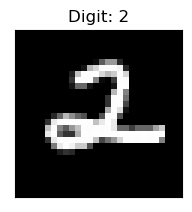

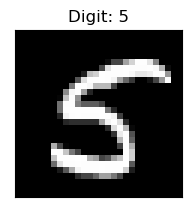

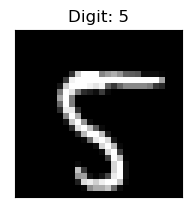

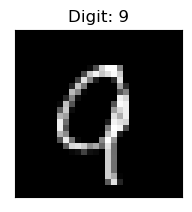

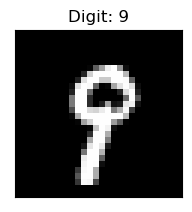

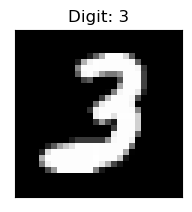

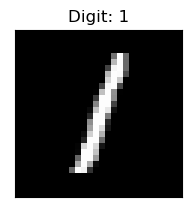

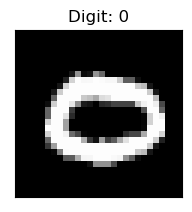

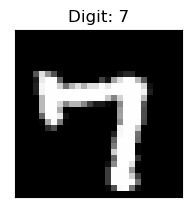

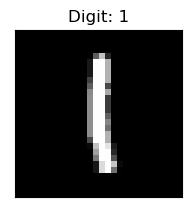

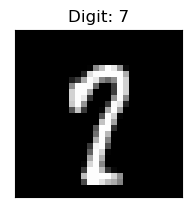

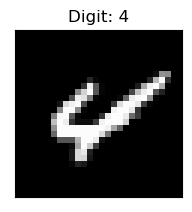

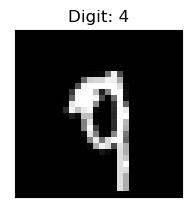

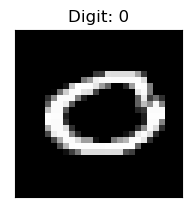

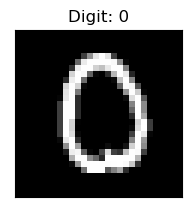

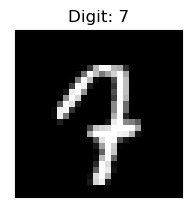

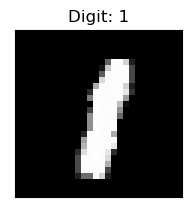

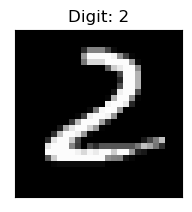

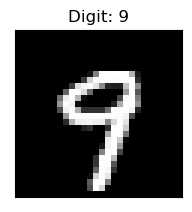

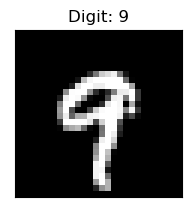

<Figure size 1600x1000 with 0 Axes>

In [22]:
plt.figure(figsize=(16, 10)) 
for i in range(20): 
    image = random.choice(X_test).squeeze() 
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i) 
plt.show()

In [24]:
predictions = np.argmax(model.predict(X_test), axis=-1) 
accuracy_score(y_test, predictions)

313/313 [==============================] - 1s 3ms/step


0.9863

In [26]:
score = model.evaluate(X_test, y_test, verbose=0) 

print('Test loss:', score[0]) #Test loss: 0.0296396646054 
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.041446201503276825
Test accuracy: 0.986299991607666
